# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [77]:
# WRITE YOUR CODE HERE
# install.packages("glmnet", dependencies = TRUE) # uncomment if you haven't installed this library
library(glmnet)
library(tidyverse)

We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [ ]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

[1] 101


(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [ ]:
# WRITE YOUR CODE HERE
train_indices <- sample(1:n, size = 50) # using 50 data points for training
x_train <- x[train_indices]
x_test <- x[-train_indices]
y_train <- y[train_indices]
y_test <- y[-train_indices]


[1] 50

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

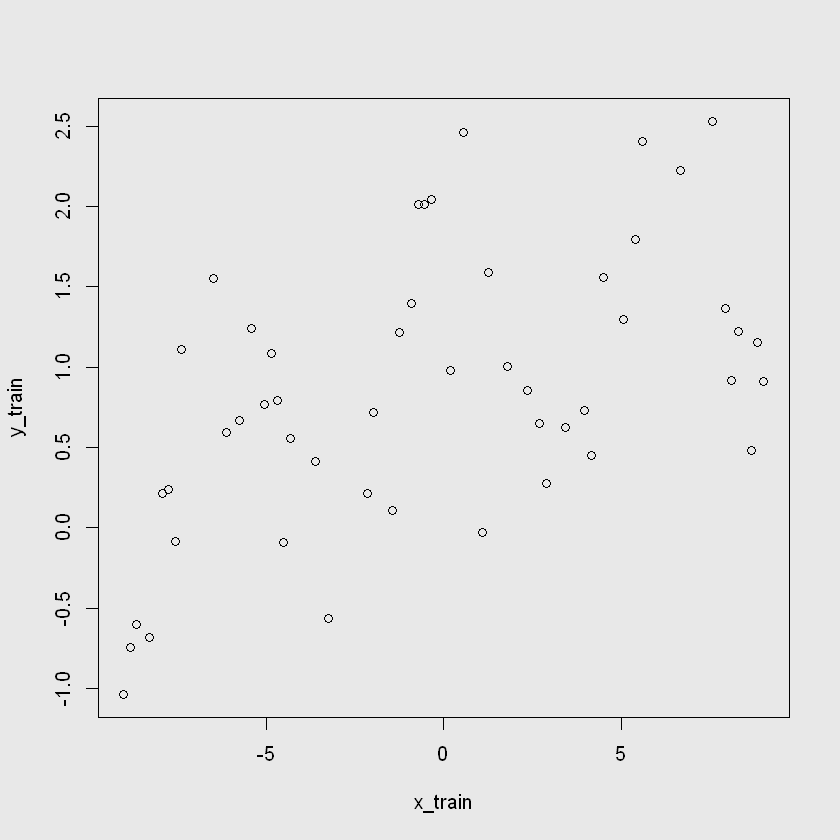

In [80]:
# WRITE YOUR CODE HERE
par(bg = "#e8e8e8")
plot(x=x_train, y=y_train, xlab="x_train", ylab="y_train")


How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*
> 
> There is a general linear trend --- y increases proportionally as x increases. However, there are also some large fluctuations.

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*


Call:
lm(formula = y ~ poly(x, 2, raw = TRUE), data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64794 -0.54050 -0.03966  0.59738  1.46142 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.872630   0.154908   5.633 9.62e-07 ***
poly(x, 2, raw = TRUE)1 0.082614   0.020695   3.992 0.000228 ***
poly(x, 2, raw = TRUE)2 0.001060   0.004205   0.252 0.802075    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7437 on 47 degrees of freedom
Multiple R-squared:  0.2611,	Adjusted R-squared:  0.2297 
F-statistic: 8.305 on 2 and 47 DF,  p-value: 0.0008155


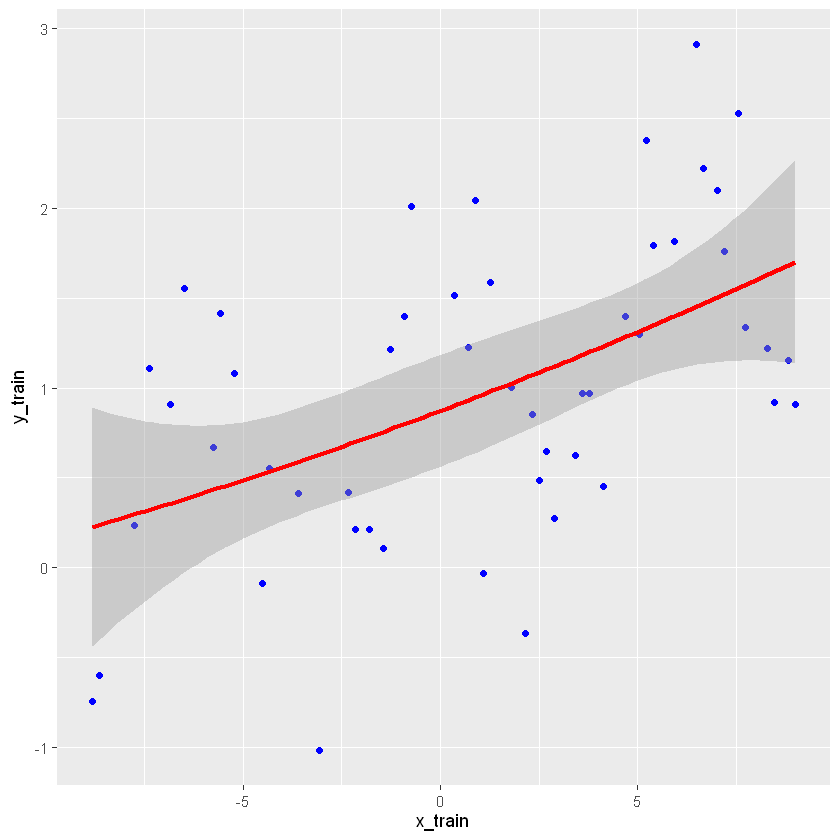

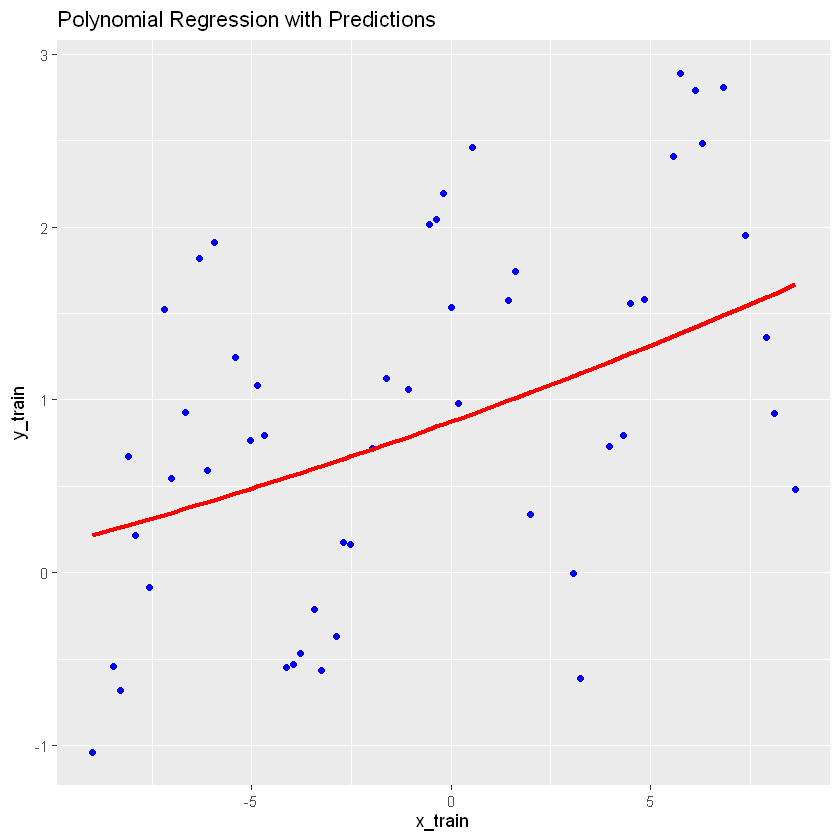

In [113]:
# WRITE YOUR CODE HERE
# Fit a polynomial regression model
train_df <- data.frame(x=x_train, y=y_train)
test_df <- data.frame(x=x_test, y=y_test)
model <- lm(y ~ poly(x, 2, raw=TRUE), data=train_df) # make sure you specify "raw"; otherwise, it will complain as it uses orthogonal
summary(model)

# Create predictions for x_test
predicted_y <- predict(model, newdata = data.frame(x = x_test))

# Create a data frame for predictions
prediction_data <- data.frame(x = x_test, y = predicted_y)


# Plot the training data with a polynomial regression line
ggplot(train_df, aes(x = x, y = y)) +
  geom_point(color = "blue") + # Add scatter points
  stat_smooth(method = "lm", formula = y ~ poly(x, 2, raw=TRUE), color = "red", size = 1.2) + # Polynomial fit
  xlab("x_train") +
  ylab("y_train")

# Plot test data with predictions
ggplot(test_df, aes(x = x, y = y)) +
  geom_point(color = "blue") + # Add scatter points for training data
  geom_line(data = prediction_data, aes(x = x, y = y), color = "red", size = 1.2) + # Add prediction line
  xlab("x_train") +
  ylab("y_train") +
  ggtitle("Polynomial Regression with Predictions")


How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *Write your response here*
> 
> The polynomial follows the general trend but it does not capture the fluctuation of the data. Our model fit could do better.

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12, raw = TRUE), data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25830 -0.24026  0.01139  0.28035  0.70891 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.607e+00  2.230e-01   7.210 1.49e-08 ***
poly(x, 12, raw = TRUE)1   3.116e-02  1.485e-01   0.210 0.835005    
poly(x, 12, raw = TRUE)2  -4.113e-01  1.079e-01  -3.812 0.000504 ***
poly(x, 12, raw = TRUE)3   1.665e-02  3.217e-02   0.518 0.607853    
poly(x, 12, raw = TRUE)4   3.645e-02  1.388e-02   2.626 0.012487 *  
poly(x, 12, raw = TRUE)5  -1.129e-03  2.238e-03  -0.505 0.616781    
poly(x, 12, raw = TRUE)6  -1.265e-03  7.235e-04  -1.748 0.088718 .  
poly(x, 12, raw = TRUE)7   3.037e-05  6.606e-05   0.460 0.648340    
poly(x, 12, raw = TRUE)8   2.209e-05  1.767e-05   1.250 0.219081    
poly(x, 12, raw = TRUE)9  -3.589e-07  8.687e-07  -0.413 0.681858    
poly(x, 12, raw = TRUE)10 -1.977e-07  2.022e-07  -0.978 

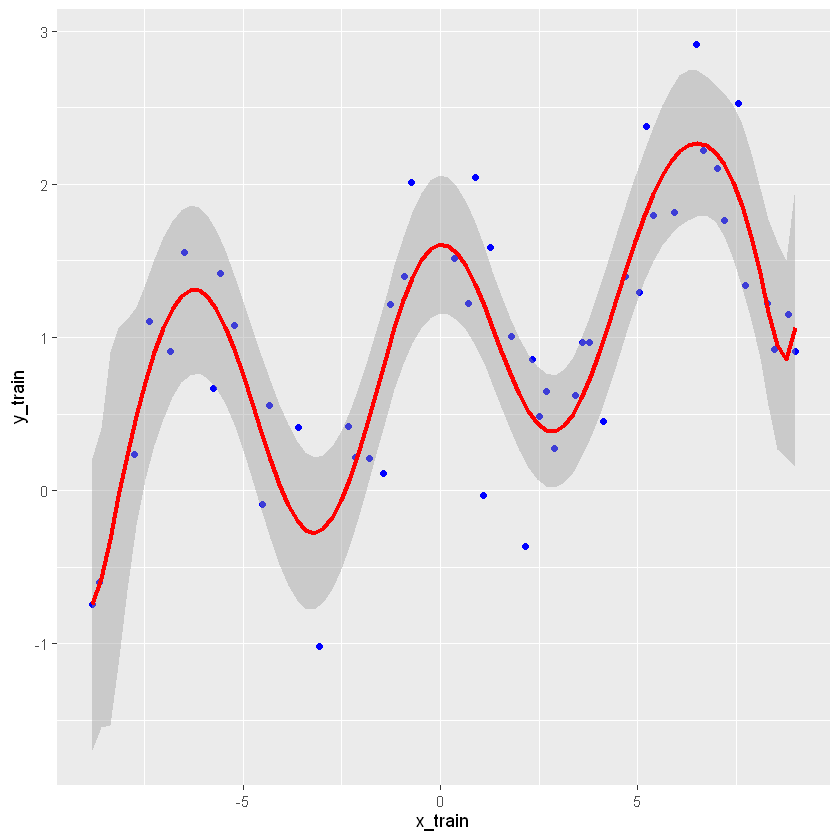

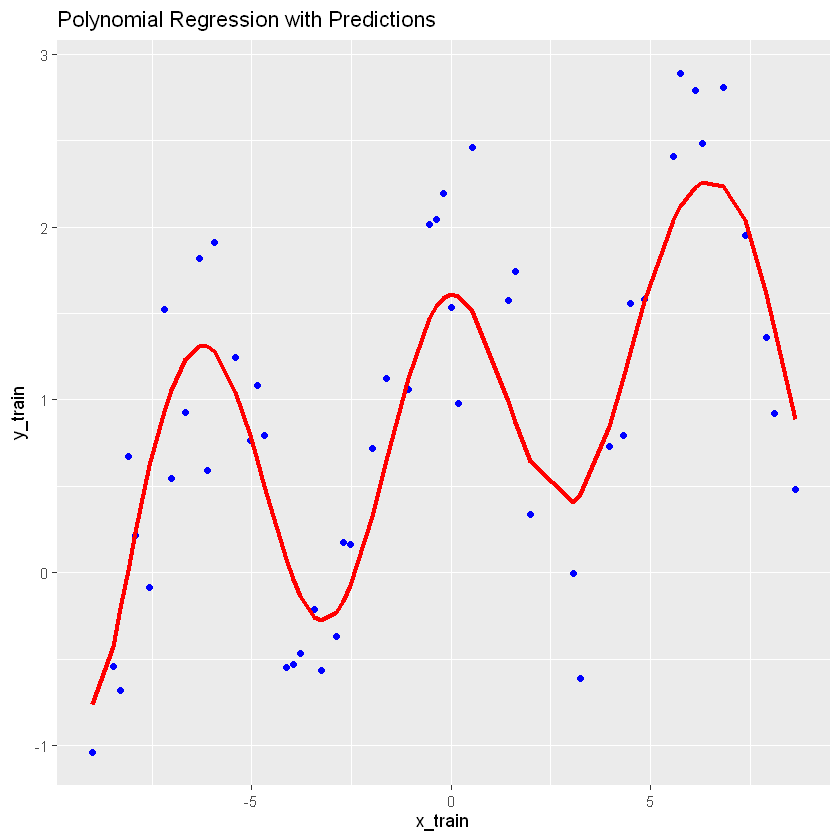

In [114]:
# WRITE YOUR CODE HERE
# Fit a polynomial regression model
train_df <- data.frame(x=x_train, y=y_train)
test_df <- data.frame(x=x_test, y=y_test)
model <- lm(y ~ poly(x, 12, raw=TRUE), data=train_df) # make sure you specify "raw"; otherwise, it will complain as it uses orthogonal
summary(model)

# Create predictions for x_test
predicted_y <- predict(model, newdata = data.frame(x = x_test))

# Create a data frame for predictions
prediction_data <- data.frame(x = x_test, y = predicted_y)


# Plot the training data with a polynomial regression line
ggplot(train_df, aes(x = x, y = y)) +
  geom_point(color = "blue") + # Add scatter points
  stat_smooth(method = "lm", formula = y ~ poly(x, 12, raw=TRUE), color = "red", size = 1.2) + # Polynomial fit
  xlab("x_train") +
  ylab("y_train")

# Plot test data with predictions
ggplot(test_df, aes(x = x, y = y)) +
  geom_point(color = "blue") + # Add scatter points for training data
  geom_line(data = prediction_data, aes(x = x, y = y), color = "red", size = 1.2) + # Add prediction line
  xlab("x_train") +
  ylab("y_train") +
  ggtitle("Polynomial Regression with Predictions")



> *Write your response here* 
> 
> The fit looks much better compared to the 2nd degree model. As long as new data is within the range of the original x_train, the performance should be quite good.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message 

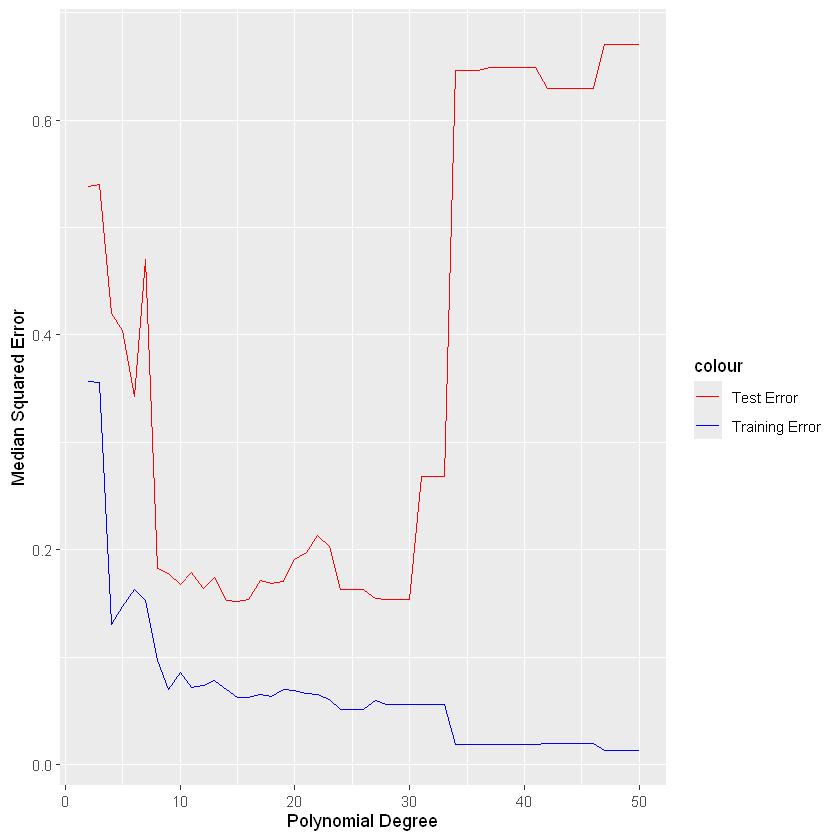

In [117]:
# Now do the variance-bias trade off analysis using regular regression
train_df <- data.frame(x=x_train, y=y_train)
test_df <- data.frame(x=x_test, y=y_test)
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    # Polynomial regression model
    model <- lm(y ~ poly(x, k, raw=TRUE), data=train_df)

    # Predict on training data and calculate median squared errors
    train_predictions <- predict(model, data.frame(x = x_train))
    train_squared_errors <- (train_predictions - y_train)^2
    train_rss[which(degree == k)] <- median(train_squared_errors)
    
    # Predict on test data and calculate median squared errors
    test_predictions <- predict(model, data.frame(x = x_test))
	test_squared_errors <- (test_predictions - y_test)^2
    test_rss[which(degree == k)] <- median(test_squared_errors)
}

# Plot your results here
# WRITE YOUR CODE HERE
# Create a data frame 
errors <- data.frame(Degree = degree, TrainError = train_rss, TestError = test_rss)

# Plot results
ggplot(errors, aes(x = Degree)) +
    geom_line(aes(y = TrainError, color = "Training Error")) +
    geom_line(aes(y = TestError, color = "Test Error")) +
    labs(x = "Polynomial Degree", y = "Median Squared Error") +
    scale_color_manual(values = c("Training Error" = "blue", "Test Error" = "red"))


What do you see as $k$ increase?

> *Write your response here* 
> 
> As k increases, the trining error decreases but the test error increase dramatically. This is a sign of overfitting.

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_test)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(model, data.frame(x = x_train)):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message 

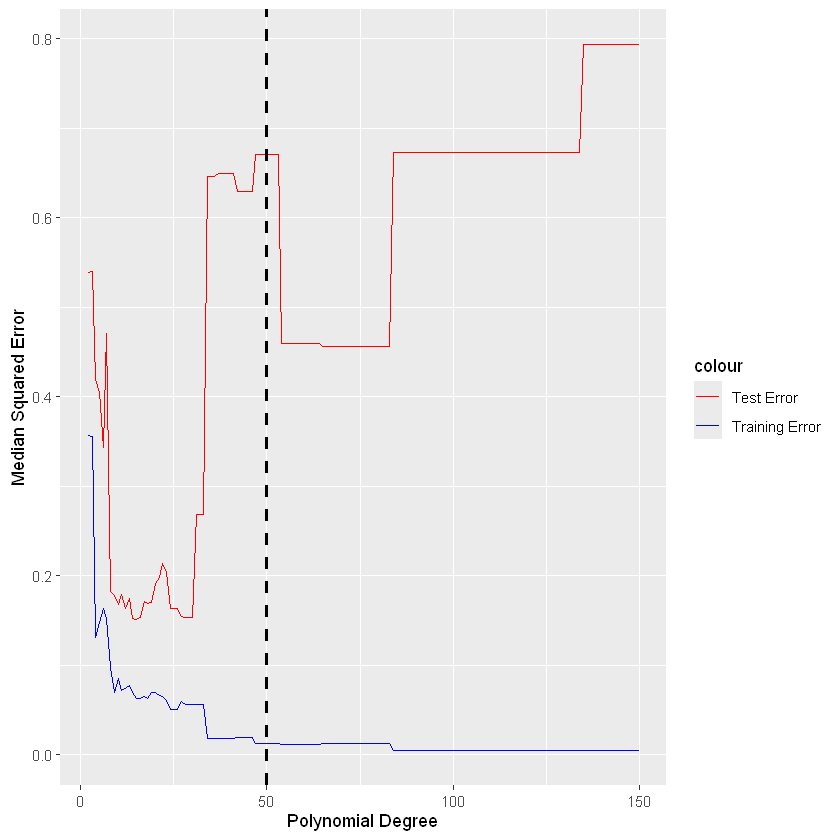

In [120]:
# WRITE YOUR CODE HERE
# Now do the variance-bias trade off analysis using regular regression
train_df <- data.frame(x=x_train, y=y_train)
test_df <- data.frame(x=x_test, y=y_test)
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    # WRITE YOUR CODE HERE
    # Polynomial regression model
    model <- lm(y ~ poly(x, k, raw=TRUE), data=train_df)

    # Predict on training data and calculate median squared errors
    train_predictions <- predict(model, data.frame(x = x_train))
    train_squared_errors <- (train_predictions - y_train)^2
    train_rss[which(degree == k)] <- median(train_squared_errors)
    
    # Predict on test data and calculate median squared errors
    test_predictions <- predict(model, data.frame(x = x_test))
	test_squared_errors <- (test_predictions - y_test)^2
    test_rss[which(degree == k)] <- median(test_squared_errors)
}

# Plot your results here
# WRITE YOUR CODE HERE
# Create a data frame 
errors <- data.frame(Degree = degree, TrainError = train_rss, TestError = test_rss)

# Plot results
ggplot(errors, aes(x = Degree)) +
    geom_line(aes(y = TrainError, color = "Training Error")) +
    geom_line(aes(y = TestError, color = "Test Error")) +
    labs(x = "Polynomial Degree", y = "Median Squared Error") +
    scale_color_manual(values = c("Training Error" = "blue", "Test Error" = "red")) +
	geom_vline(xintercept = length(x_train), color = "black", linetype = "dashed", size = 1)



What do you see as $k$ gets larger than $n$?

> *Write your response here* 
> 
> In our case, there is a sudden dip of test error, but the error is still quite large. Eventually the training error increased even more greatly. The test and training errors diverge, suggesting significant overfit.

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

Warning message:
"from glmnet C++ code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet C++ code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet C++ code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"
Warning message in getcoef(fit, nvars, nx, vnames):
"an empty model has been returned; probably a convergence issue"
Warning message:
"from glmnet C++ code (error code -1); Convergence for 1th lambda value not reached after maxit=100000 iterations; solu

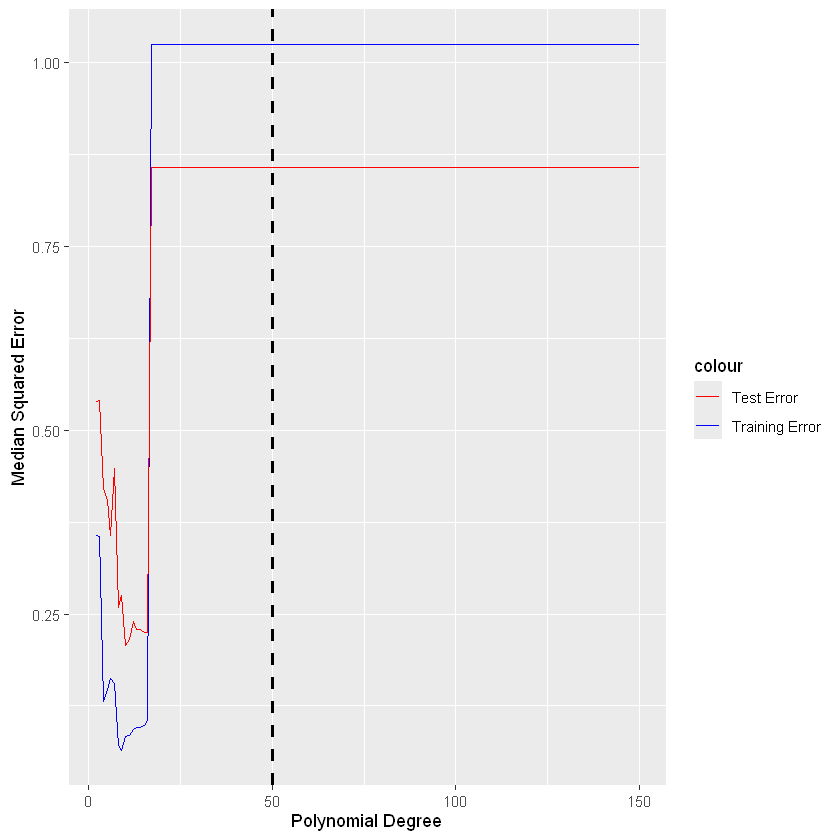

In [140]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)



for (k in degree) {
    # WRITE YOUR CODE HERE
    # Polynomial regression model
	x_poly_train <- poly(x_train, k, raw = TRUE)  # Create polynomial features
	x_poly_test <- poly(x_test, k, raw = TRUE)

	# Prepare the polynomial matrices
	x_poly_train_matrix <- as.matrix(x_poly_train)
	x_poly_test_matrix <- as.matrix(x_poly_test)

	ridge.model = glmnet(x_poly_train_matrix, y_train, alpha=0, lambda=lambda, thresh=1e-12)

    # Predict on training data and calculate median squared errors
    train_predictions <- predict(ridge.model, s=lambda, newx=x_poly_train_matrix)
    train_squared_errors <- (train_predictions - y_train)^2
    train_rss[which(degree == k)] <- median(train_squared_errors)
    
    # Predict on test data and calculate median squared errors
    test_predictions <- predict(ridge.model, s=lambda, newx=x_poly_test_matrix)
	test_squared_errors <- (test_predictions - y_test)^2
    test_rss[which(degree == k)] <- median(test_squared_errors)
}

# Plot your results here
# WRITE YOUR CODE HERE
# Create a data frame 
errors <- data.frame(Degree = degree, TrainError = train_rss, TestError = test_rss)

# Plot results
ggplot(errors, aes(x = Degree)) +
    geom_line(aes(y = TrainError, color = "Training Error")) +
    geom_line(aes(y = TestError, color = "Test Error")) +
    labs(x = "Polynomial Degree", y = "Median Squared Error") +
    scale_color_manual(values = c("Training Error" = "blue", "Test Error" = "red")) +
	geom_vline(xintercept = length(x_train), color = "black", linetype = "dashed", size = 1)



# Plot your results here
# WRITE YOUR CODE HERE


What happens now when $k$ gets larger than $n$?

> *Write your response here* 
> 
> When $k$ gets sufficiently large (or larger than $n$), the regularization method shrinks the significance of extra terms. The both test and training errors become closer. As shown on the ploat, both of them plateaus after a certain value of $k$.

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here* 
> 
> Regularization penalizes large coefficients, which helps control model complexity and reduces overfitting, therefore reducing variance. In the meantime, having fewer effective coefficients means that the model is less flexible and contains more bias.

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here* 
> 
> Regularization fundamentally shifts the problem from finding a single "exact fit" to finding the best compromise between bias and variance.

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*